In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import matplotlib.pyplot as plt
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs
from LinearMPC.utils import GAMA, VX, VY, VZ

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 10
H = 10

# Since the system is divided in independent subsystems, 
# we can put the initial state as follows which is equivalent to checking each subsystem separately
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=float)
x0[VX] = 5
x0[VY] = 5
x0[VZ] = 5
x0[GAMA] = np.deg2rad(40)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Computing maximum invariant set ...
Maximum invariant set successfully computed after 13 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 13 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 1 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 24 iterations.
Simulating time 0.00: 

/Users/jverbois/Python/epfl/MPC-Course-EPFL/.venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating

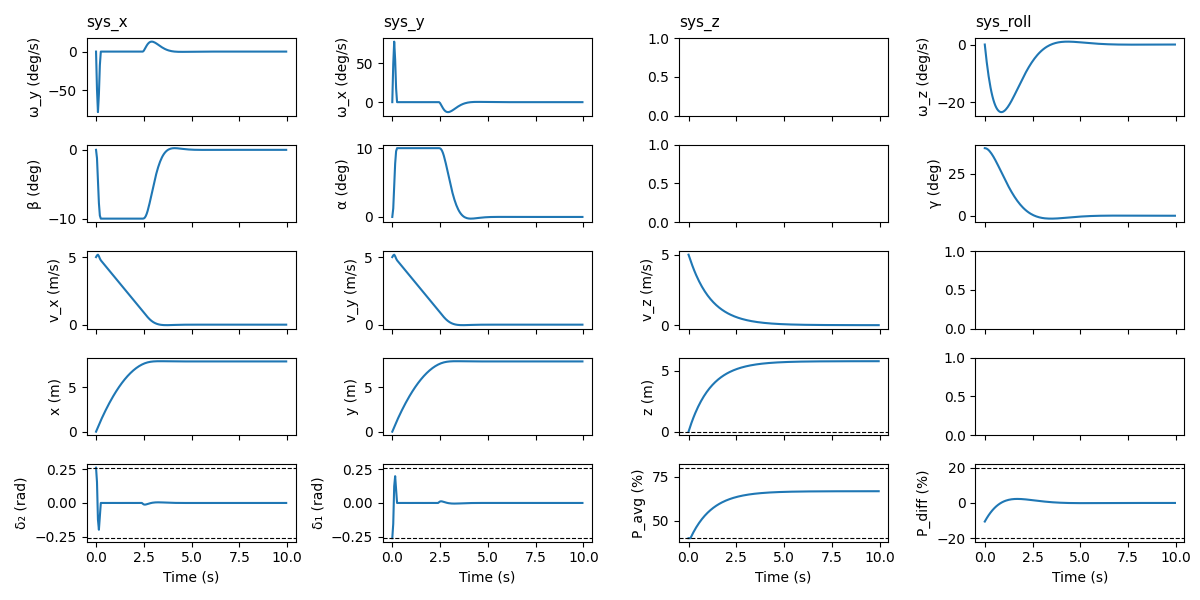

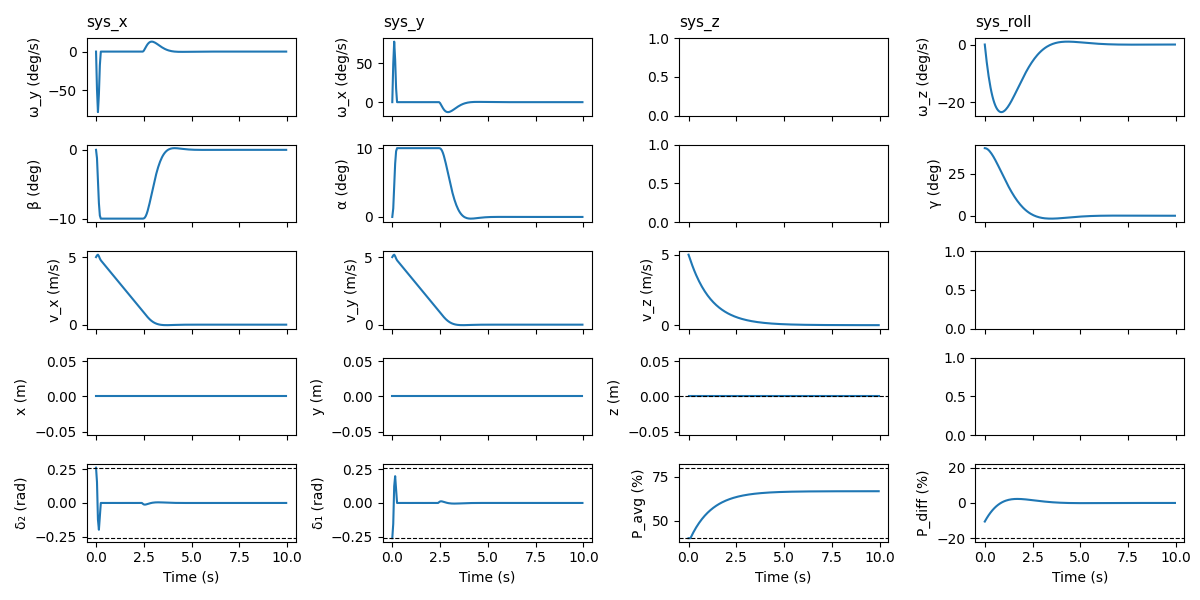

In [7]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_ol[:-1, 0], x_ol[:, :-1,0], u_ol[:, :, 0])

In [5]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 0.7
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[:, :-1], X_ol=x_ol, U_ol=u_ol);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=142, max=199, step=2), Int…

VZ <=     4.6066
VZ >=    -2.3033


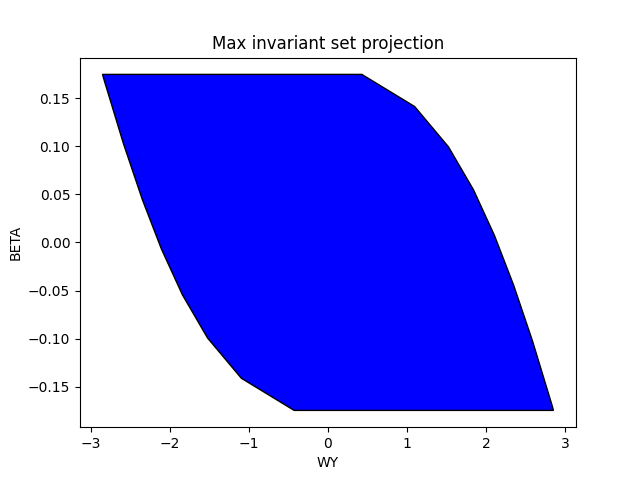

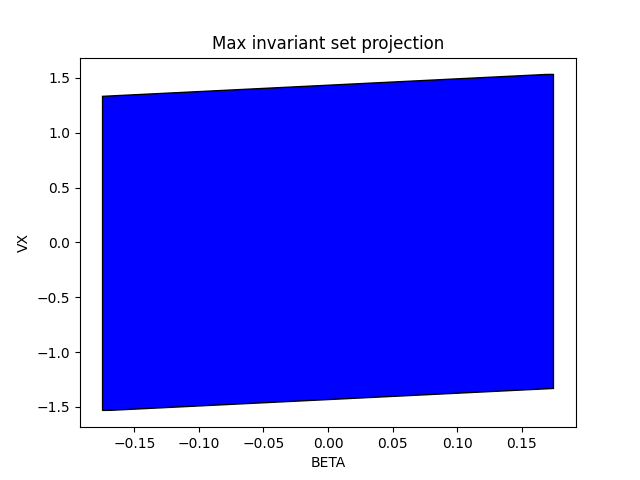

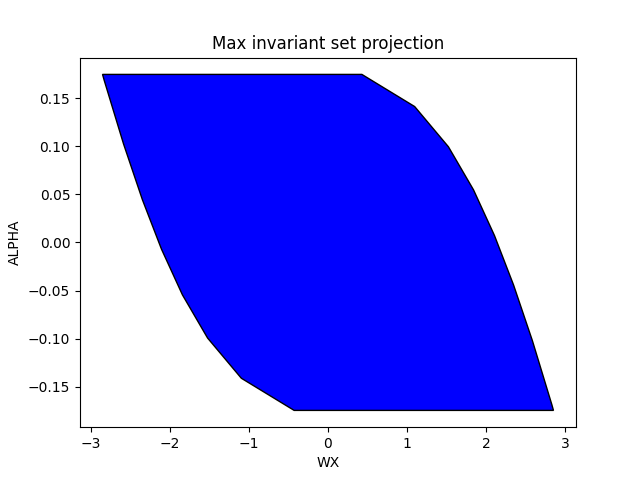

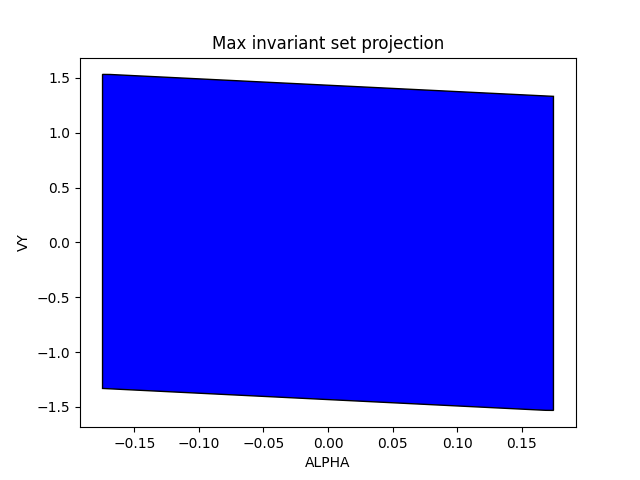

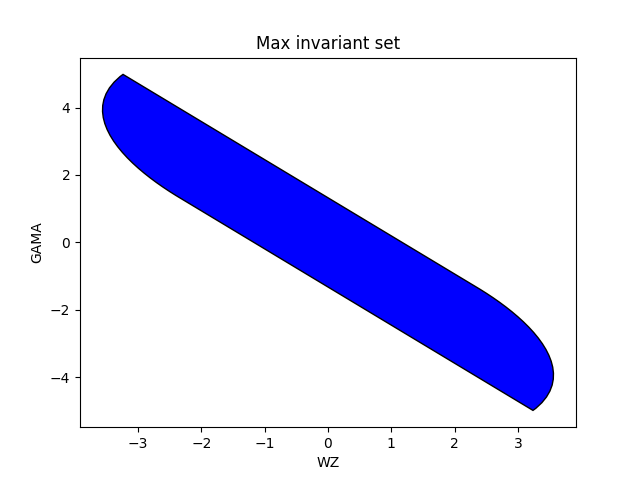

In [6]:
mpc.mpc_x.plot_max_invariant_set()
mpc.mpc_y.plot_max_invariant_set()
mpc.mpc_z.plot_max_invariant_set()
mpc.mpc_roll.plot_max_invariant_set()